<a href="https://colab.research.google.com/github/robsonspereira/COVID19/blob/master/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import plotly.express as px
import datetime
import matplotlib.pyplot as plt

In [60]:
d = datetime. date. today()
print(d)
day = '{:0>2}'.format(d.day)
month= '{:0>2}'.format(d.month)
year='{:0>4}'.format(d.year)
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s-%s-%s.xlsx"%(year,month,day)
print(url)


2020-03-21
https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-21.xlsx


In [48]:
base_import = pd.read_excel(url)
base_import.head()
base_import = base_import[base_import['Cases']!=0]
base_import.dropna(inplace=True)
base_import = base_import.sort_values(by =['GeoId','DateRep'])
base_import.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
169,2020-03-03,3,3,2020,1,0,Andorra,AD
168,2020-03-14,14,3,2020,1,0,Andorra,AD
167,2020-03-16,16,3,2020,3,0,Andorra,AD
166,2020-03-17,17,3,2020,9,0,Andorra,AD
164,2020-03-19,19,3,2020,39,0,Andorra,AD


In [0]:
Total_Cases = base_import[['GeoId','DateRep','Cases']]
Total_Cases['Total Cases']= Total_Cases.groupby(['GeoId']).cumsum()
Total_Cases.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GeoId,DateRep,Cases,Total Cases
169,AD,2020-03-03,1,1
168,AD,2020-03-14,1,2
167,AD,2020-03-16,3,5
166,AD,2020-03-17,9,14
164,AD,2020-03-19,39,53


In [0]:
Total_Deaths = base_import[['GeoId','DateRep','Deaths']]
Total_Deaths['Total Deaths']= Total_Deaths.groupby(['GeoId']).cumsum()
Total_Deaths.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GeoId,DateRep,Deaths,Total Deaths
169,AD,2020-03-03,0,0
168,AD,2020-03-14,0,0
167,AD,2020-03-16,0,0
166,AD,2020-03-17,0,0
164,AD,2020-03-19,0,0


In [0]:
GeoIDGroup = base_import.groupby(['GeoId']).agg({'DateRep':['min','max'],'Cases':['sum'],'Deaths':['sum']})
GeoIDGroup.columns = ['DateFirstReport','DateLastReport','Cases','Deaths'] 
GeoIDGroup['Duration'] = (GeoIDGroup['DateLastReport']-GeoIDGroup['DateFirstReport'])
GeoIDGroup['Duration'] = pd.to_numeric(GeoIDGroup['Duration'].dt.days, downcast='integer')
GeoIDGroup['CasesPerDay'] = (GeoIDGroup['Cases']/GeoIDGroup['Duration'].astype(int))
GeoIDGroup['DeathsPerCases'] = (GeoIDGroup['Deaths']/GeoIDGroup['Cases'])
GeoIDGroup

,DateFirstReport,DateLastReport,Cases,Deaths,Duration,CasesPerDay,DeathsPerCases
GeoId,,,,,,,
AD,2020-03-03,2020-03-20,75,0,17,4.411765,0.000000
AE,2020-01-27,2020-03-20,140,0,53,2.641509,0.000000
AF,2020-02-25,2020-03-21,24,0,25,0.960000,0.000000
AG,2020-03-15,2020-03-15,1,0,0,inf,0.000000
AL,2020-03-09,2020-03-20,70,2,11,6.363636,0.028571
...,...,...,...,...,...,...,...
VN,2020-01-24,2020-03-21,87,0,57,1.526316,0.000000
XK,2020-03-16,2020-03-21,24,0,5,4.800000,0.000000
ZA,2020-03-06,2020-03-21,205,0,15,13.666667,0.000000


In [0]:
GeoIDGroup.loc[['BR','IT','CN','US','ES','IE']]

,DateFirstReport,DateLastReport,Cases,Deaths,Duration,CasesPerDay,DeathsPerCases
GeoId,,,,,,,
BR,2020-02-26,2020-03-21,904,11,24,37.666667,0.012168
IT,2020-01-31,2020-03-21,47021,4032,50,940.420000,0.085749
CN,2019-12-31,2020-03-21,81416,3259,81,1005.135802,0.040029
US,2020-01-21,2020-03-21,19624,260,60,327.066667,0.013249
ES,2020-02-01,2020-03-21,19980,1002,49,407.755102,0.050150
IE,2020-03-01,2020-03-21,683,3,20,34.150000,0.004392


In [0]:
  Events = base_import.merge(GeoIDGroup[['DateFirstReport']],left_on='GeoId',right_index=True, how ='left')
  Events['Day_report'] = (Events['DateRep']-Events['DateFirstReport']).dt.days.astype(int)
  Events= Events.merge(Total_Cases[['Total Cases']],left_index=True,right_index=True, how='left')
  Events= Events.merge(Total_Deaths[['Total Deaths']],left_index=True,right_index=True, how='left')
  Events

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,DateFirstReport,Day_report,Total Cases,Total Deaths
169,2020-03-03,3,3,2020,1,0,Andorra,AD,2020-03-03,0,1,0
168,2020-03-14,14,3,2020,1,0,Andorra,AD,2020-03-03,11,2,0
167,2020-03-16,16,3,2020,3,0,Andorra,AD,2020-03-03,13,5,0
166,2020-03-17,17,3,2020,9,0,Andorra,AD,2020-03-03,14,14,0
164,2020-03-19,19,3,2020,39,0,Andorra,AD,2020-03-03,16,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5041,2020-03-19,19,3,2020,31,0,South_Africa,ZA,2020-03-06,13,116,0
5040,2020-03-20,20,3,2020,34,0,South_Africa,ZA,2020-03-06,14,150,0
5039,2020-03-21,21,3,2020,55,0,South_Africa,ZA,2020-03-06,15,205,0
6010,2020-03-19,19,3,2020,2,0,Zambia,ZM,2020-03-19,0,2,0


In [56]:
Events_filter=Events.query( 'Day_report<=30 ')
Events_filter= Events_filter.query('GeoId=="US" or GeoId=="IT" or GeoId=="CN" or GeoId=="BR"')

graph = px.line(Events_filter,
                x = 'Day_report',
                y = 'Cases',
                color = 'GeoId',
                line_group ='GeoId',
                hover_name = 'GeoId')

graph.show()

In [0]:
graph = px.line(Events_filter,
                x = 'Day_report',
                y = 'Total Cases',
                color = 'GeoId',
                line_group ='GeoId',
                hover_name = 'Countries and territories')

graph.show()

In [0]:
graph = px.line(Events_filter,
                x = 'Day_report',
                y = 'Total Deaths',
                color = 'GeoId',
                line_group ='GeoId',
                hover_name = 'GeoId')

graph.show()

In [71]:
Events_today=Events.loc[Events['DateRep'] == d]
Events_today.sort_values(by =(['Cases']),ascending=False, inplace=True)
Events_today

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,DateFirstReport,Day_report,Total Cases,Total Deaths
2924,2020-03-21,21,3,2020,5986,625,Italy,IT,2020-01-31,50,47021,4032
5828,2020-03-21,21,3,2020,5374,110,United_States_of_America,US,2020-01-21,60,19624,260
2131,2020-03-21,21,3,2020,4185,2,Germany,DE,2020-01-28,53,18323,45
5135,2020-03-21,21,3,2020,2833,235,Spain,ES,2020-02-01,49,19980,1002
1955,2020-03-21,21,3,2020,1617,78,France,FR,2020-01-25,56,12612,449
...,...,...,...,...,...,...,...,...,...,...,...,...
3739,2020-03-21,21,3,2020,1,0,Mongolia,MN,2020-03-10,11,6,0
3749,2020-03-21,21,3,2020,1,0,Montserrat,MS,2020-03-21,0,1,0
4000,2020-03-21,21,3,2020,1,0,Niger,NE,2020-03-21,0,1,0
4406,2020-03-21,21,3,2020,1,0,Papua_New_Guinea,PG,2020-03-21,0,1,0


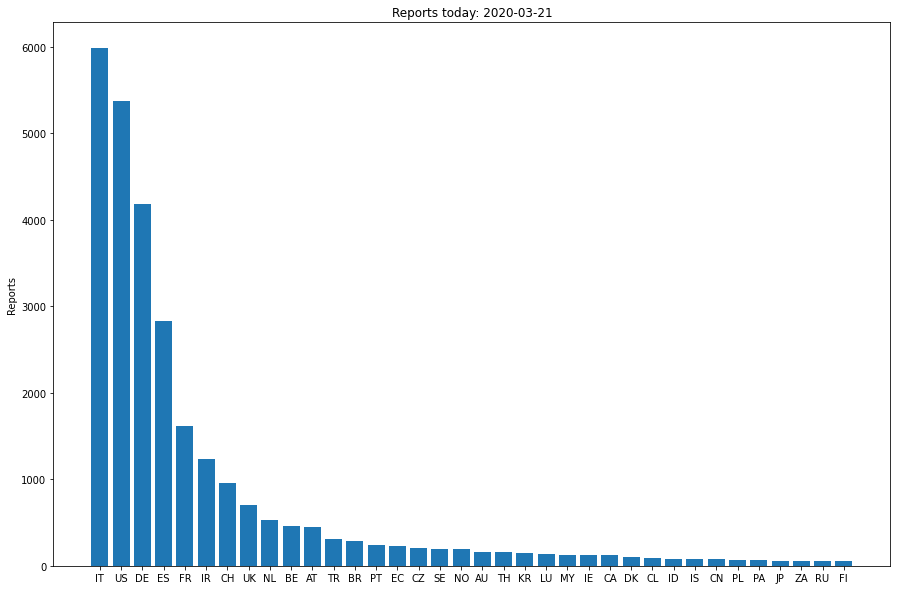

In [99]:
Events_today_filter = Events_today.query('Cases >= 50')
plt.figure(figsize=(15,10))
plt.bar(x,y,align='center')
x=Events_today_filter['GeoId']
y=Events_today_filter['Cases']
plt.ylabel('Reports')
plt.title('Reports today: %s'%(d))
plt.show()
